In [1]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd


#visulaization modules
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objs as go

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)


# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [2]:
## dataset link :- https://www.kaggle.com/datasets/billbasener/coronary-heart-disease/data

In [3]:
df = pd.read_csv("heartd_clean.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<a id='3.1'>

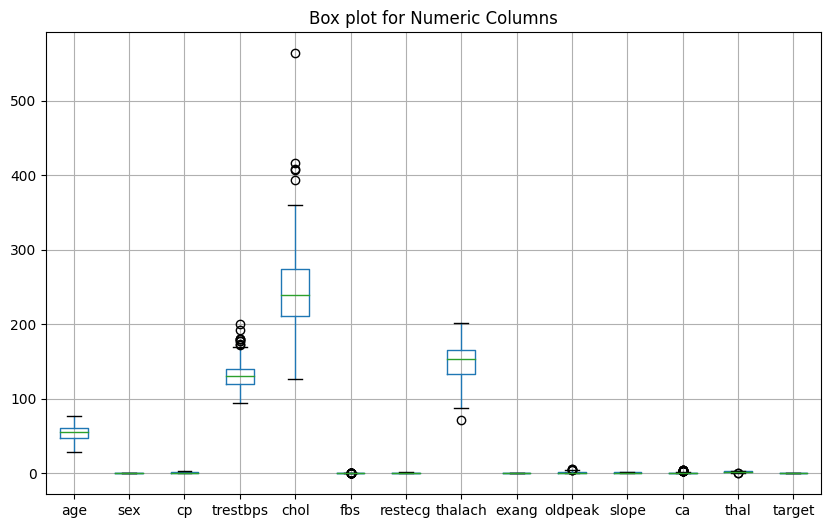

In [6]:
plt.figure(figsize=(10, 6))
numeric_columns.boxplot()
plt.title('Box plot for Numeric Columns')
plt.show()

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
from feature_engine.outliers import Winsorizer


# Specify the columns for Winsorizer
columns_to_winsorize = ['trestbps', 'chol']

# Apply Winsorizer
win = Winsorizer(capping_method='iqr', variables=columns_to_winsorize, tail='both', fold=1.5)
df_winsorized = win.fit_transform(df)

# Display the Winsorized DataFrame
print("Winsorized DataFrame:")
df_winsorized


ModuleNotFoundError: No module named 'feature_engine'

In [9]:
df_winsorized['target'].value_counts()

NameError: name 'df_winsorized' is not defined

In [11]:
# df.to_csv('heartd_clean.csv',index =False)

In [12]:
X= df_winsorized.drop('target',axis = 1)
y = df_winsorized['target']

In [13]:
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler(random_state=42)
X,Y= rs.fit_resample(X,y)

Y.value_counts()

target
1    165
0    165
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=1,test_size=0.2)

In [15]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
59,57,0,0,128,303.0,0,0,159,0,0.0,2,1,2
267,49,1,2,118,149.0,0,0,126,0,0.8,2,3,2
180,55,1,0,132,353.0,0,1,132,1,1.2,1,1,3
192,54,1,0,120,188.0,0,1,113,0,1.4,1,1,3
284,61,1,0,140,207.0,0,0,138,1,1.9,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,57,1,0,150,276.0,0,0,112,1,0.6,1,1,1
247,66,1,1,160,246.0,0,1,120,1,0.0,1,3,1
132,42,1,1,120,295.0,0,1,162,0,0.0,2,0,2
80,41,1,2,112,250.0,0,1,179,0,0.0,2,0,2


In [16]:

# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# decision Tree


DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,X,Y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)



********************
********************
Train accuracy: 1.0
Test accuracy: 0.7575757575757576
********************
[0.74242424 0.90909091 0.6969697  0.77272727 0.81818182]
0.7878787878787878
********************
              precision    recall  f1-score   support

           0       0.72      0.92      0.80        36
           1       0.85      0.57      0.68        30

    accuracy                           0.76        66
   macro avg       0.78      0.74      0.74        66
weighted avg       0.78      0.76      0.75        66

********************
75.76% Accurate
********************


In [18]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,Y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.8484848484848485
train accuracy: 1.0
********************
0.8545454545454545
********************
********************
84.85% Accurate


In [19]:

# logistic regression

LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,X,Y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 0.8181818181818182
train accuracy: 0.8560606060606061
********************
0.8333333333333333
********************
              precision    recall  f1-score   support

           0       0.72      0.92      0.80        36
           1       0.85      0.57      0.68        30

    accuracy                           0.76        66
   macro avg       0.78      0.74      0.74        66
weighted avg       0.78      0.76      0.75        66

********************
81.82% Accurate


In [20]:
#  XGBoost

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

# prediction
train_prediction= XGB.predict(X_train)
test_prediction= XGB.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(XGB,X,Y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


XGB_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(XGB_HSC*100,2)}% Accurate")

********************
test accuracy: 0.7878787878787878
train accuracy: 1.0
********************
0.8181818181818181
********************
              precision    recall  f1-score   support

           0       0.72      0.92      0.80        36
           1       0.85      0.57      0.68        30

    accuracy                           0.76        66
   macro avg       0.78      0.74      0.74        66
weighted avg       0.78      0.76      0.75        66

********************
78.79% Accurate


In [21]:
from sklearn.ensemble import AdaBoostClassifier
# random forest

ada=AdaBoostClassifier(random_state=42)
ada.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= ada.predict(X_train)
test_prediction= ada.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(ada,X,Y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
ada_h = accuracy_score(test_prediction,y_test)
print(f"{round(ada_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.803030303030303
train accuracy: 0.9545454545454546
********************
0.8151515151515151
********************
********************
80.3% Accurate


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
# random forest

gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,X,Y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
gbc_h = accuracy_score(test_prediction,y_test)
print(f"{round(gbc_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.8484848484848485
train accuracy: 0.9962121212121212
********************
0.8272727272727272
********************
********************
84.85% Accurate


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# model
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Test accuracy:',accuracy_score(y_test,test_prediction))
print('Train accuracy:',accuracy_score(y_train,train_prediction))

print('*'*20)
result = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(result)


print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_prediction))


print('*'*20)
# Accuracy score
Knn_SC = accuracy_score(test_prediction,y_test)
print(f"{round(Knn_SC*100,2)}% Accurate")


********************
Test accuracy: 0.6666666666666666
Train accuracy: 0.7613636363636364
********************
Confusion Matrix:
[[27  9]
 [13 17]]
********************
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        36
           1       0.65      0.57      0.61        30

    accuracy                           0.67        66
   macro avg       0.66      0.66      0.66        66
weighted avg       0.67      0.67      0.66        66

********************
66.67% Accurate


# deep learning Ann Algorithm

In [24]:
import tensorflow as tf
import keras
import warnings
warnings.simplefilter('ignore')

In [25]:
# Ann deep learning
from keras.models import Sequential
ann = Sequential()
from keras.layers import Dense

ann.add(Dense(input_dim= 13, units= 6, kernel_initializer= 'uniform',activation = 'relu'))
# adding second hidden layer
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# adding output layer
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])


In [26]:
ann.fit(X_train,y_train,epochs =100,batch_size = 32)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5114
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5114
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5114
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5114
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5114
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5114
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5114
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5114
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5114
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5114
Epoch 11/100
9/9 [===========

In [27]:

train_prediction = ann.predict(X_train)
test_prediction = ann.predict(X_test)

test_prediction = (test_prediction>=0.5)
train_prediction = (train_prediction>=0.5)

3/3 [==============================] - 0s 2ms/step


In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix

print('test accuracy:', accuracy_score(y_test,test_prediction))
print('train accuracy:', accuracy_score(y_train,train_prediction))
print(confusion_matrix(y_test,test_prediction))


ann_hc = accuracy_score(y_test,test_prediction)
print(f"{round(ann_hc*100,2)}% Accurate")

test accuracy: 0.8181818181818182
train accuracy: 0.8333333333333334
[[28  8]
 [ 4 26]]
81.82% Accurate


In [29]:
score = [DT_SC,RF_SC,lr_HSC,Knn_SC,XGB_HSC,ada_h,gbc_h,ann_hc]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "Logistic Regression",'Knn','XGBoost','AdaBoost',"GradientBoostingClassifier",'Ann'],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.848485
6,GradientBoostingClassifier,0.848485
2,Logistic Regression,0.818182
7,Ann,0.818182
5,AdaBoost,0.803030
4,XGBoost,0.787879
0,Decision Tree,0.757576
3,Knn,0.666667


In [30]:
import pickle
#save the model
model =rfc# Your machine learning model object
file_path = 'rfc_hd.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [31]:
# load the model
import pickle

file_path = 'rfc_hd.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [32]:
X_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
191,58,1,0,128,216.0,0,0,131,1,2.2,1,3,3
295,63,1,0,140,187.0,0,0,144,1,4.0,2,2,3
162,41,1,1,120,157.0,0,1,182,0,0.0,2,0,2
175,40,1,0,110,167.0,0,0,114,1,2.0,1,0,3
161,55,0,1,132,342.0,0,1,166,0,1.2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,170,274.0,1,0,150,1,1.6,1,0,3
255,45,1,0,142,309.0,0,0,147,1,0.0,1,3,3
72,29,1,1,130,204.0,0,0,202,0,0.0,2,0,2
235,51,1,0,140,299.0,0,1,173,1,1.6,2,0,3


In [33]:
loaded_model.predict([[58,	1,	0,	128	,216.0	,0	,0,	131	,1,	2.2,	1,	3,	3]]) #0

array([0], dtype=int64)

In [34]:
loaded_model.predict([[56,1,1,120,236,0,1,178,0,0.8,2,0,2]]) #0

array([1], dtype=int64)

In [35]:
loaded_model.predict([[69,1,3,160,234,1,0,131,0,0.1,1,1,2]]) #1

array([1], dtype=int64)

In [36]:
loaded_model.predict([[70,1,0,130,322,0,0,109,0,2.4,1,3,2]]) #0

array([0], dtype=int64)

In [37]:
loaded_model.predict([[63,1,0,140,187,0,0,144,1,4.0,2,2,3]]) #0


array([0], dtype=int64)

<a id = '5'></a>

<a id = '5.1'>
    

<a id = '5.3'>

## Model 3 With Decission Tree

In [85]:
# Define the parameter grid for the grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_dt = best_dt_classifier.predict(x_test_resampled)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test_resampled, y_pred_dt)
print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_dt))

# ROC curve
roc_auc = roc_auc_score(y_test_resampled, best_dt_classifier.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, best_dt_classifier.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test_resampled, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Non-Stroke', 'Predicted Stroke'])
plt.yticks([0.5, 1.5], ['Actual Non-Stroke', 'Actual Stroke'])
plt.show()

NameError: name 'GridSearchCV' is not defined

<a id = '5.4'>

## Model 4 With KNN

In [ ]:
# Define the parameter grid for the grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_knn_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_knn = best_knn_classifier.predict(x_test_resampled)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test_resampled, y_pred_knn)
print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_knn))

# ROC curve
roc_auc = roc_auc_score(y_test_resampled, best_knn_classifier.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, best_knn_classifier.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test_resampled, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Non-Stroke', 'Predicted Stroke'])
plt.yticks([0.5, 1.5], ['Actual Non-Stroke', 'Actual Stroke'])
plt.show()

<a id = '5.5'>

### Model 5 Stacking model using (SVM, Decision Tree, Logistic Regression, KNN)

In [ ]:
base_models = [('SVM',SVC()),('Decision Tree',DecisionTreeClassifier()),('Logistic Regerssion',LogisticRegression()) , ('KNN',KNeighborsClassifier(n_neighbors=3))]
stacking = StackingClassifier(
    estimators = base_models , 
    final_estimator = LogisticRegression(),
    cv = 5
)

stacking.fit(x_train_resampled , y_train_resampled)
# Predict on the test set
y_pred_stacking = stacking.predict(x_test_resampled)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test_resampled, y_pred_stacking)
print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_resampled, y_pred_stacking))

# ROC curve
roc_auc = roc_auc_score(y_test_resampled, stacking.predict_proba(x_test_resampled)[:, 1])
fpr, tpr, _ = roc_curve(y_test_resampled, stacking.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_stacking = confusion_matrix(y_test_resampled, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacking, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Predicted Non-Stroke', 'Predicted Stroke'])
plt.yticks([0.5, 1.5], ['Actual Non-Stroke', 'Actual Stroke'])
plt.show()


<a id = '5.6'>

## Model 6 Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
)

grid_search_rf.fit(x_train_resampled, y_train_resampled)

best_params_rf = grid_search_rf.best_params_

best_rf_classifier = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_classifier.fit(x_train_resampled, y_train_resampled)

y_pred_rf = best_rf_classifier.predict(x_test_resampled)

accuracy_rf_train = best_rf_classifier.score(x_train_resampled, y_train_resampled)
accuracy_rf_test = accuracy_score(y_test_resampled, y_pred_rf)
print("Best Hyperparameters for Random Forest:", best_params_rf)
print(f"Accuracy for Random Forest (Train): {accuracy_rf_train:.4f}")
print(f"Accuracy for Random Forest (Test): {accuracy_rf_test:.4f}")

# ROC curve
roc_auc_rf = roc_auc_score(y_test_resampled, best_rf_classifier.predict_proba(x_test_resampled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test_resampled, best_rf_classifier.predict_proba(x_test_resampled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_resampled, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues', linewidths=2.5, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest')
plt.xticks([0.5, 1.5], ['Predicted Non-Stroke', 'Predicted Stroke'])
plt.yticks([0.5, 1.5], ['Actual Non-Stroke', 'Actual Stroke'])
plt.show()

# Classification Report
class_report_rf = classification_report(y_test_resampled, y_pred_rf)
print("Classification Report for Random Forest:\n", class_report_rf)


<a id = '6'></a>


   <h2 style="font-size: 35px; font-family: Garamond; font-weight: normal; color: #000080; padding: 
               20px; border-radius: 100px 100px; text-align: center;  background-color: #f6f5f5 ;">
     6. Recommendations📊</h2>
     

### 💡 Suggestions to Reduce the Risk of Stroke

1. **Maintain a Healthy Diet:** 🥗 Eating a balanced diet rich in fruits, vegetables, whole grains, lean proteins, and healthy fats can help control weight and reduce the risk of stroke.

2. **Regular Physical Activity:** 🏃‍♂️ Engaging in regular exercise, such as brisk walking, swimming, or cycling, can improve cardiovascular health and reduce stroke risk.

3. **Monitor Blood Pressure:** 🩺 High blood pressure is a major risk factor for stroke. Regularly check your blood pressure and follow medical advice for managing hypertension.

4. **Manage Cholesterol Levels:** 🌡️ High cholesterol levels can lead to plaque buildup in arteries, increasing stroke risk. Consult a healthcare provider for cholesterol management.

5. **Quit Smoking:** 🚭 Smoking damages blood vessels and raises the risk of blood clots. Quitting smoking is one of the most effective ways to reduce stroke risk.

6. **Limit Alcohol Consumption:** 🍷 Excessive alcohol intake can raise blood pressure and contribute to stroke risk. Consume alcohol in moderation or as recommended by healthcare professionals.

7. **Control Diabetes:** 🩸 If you have diabetes, manage it carefully through medication, diet, and regular monitoring to prevent complications that increase stroke risk.

8. **Maintain a Healthy Weight:** ⚖️ Obesity is linked to a higher risk of stroke. Achieving and maintaining a healthy weight can reduce this risk.

9. **Stay Hydrated:** 💧 Proper hydration is important for overall health, including cardiovascular health. Drink an adequate amount of water daily.

10. **Manage Stress:** 🧘‍♀️ Chronic stress can contribute to high blood pressure and other stroke risk factors. Practice stress-reduction techniques such as meditation or yoga.

<div style="border-radius: 10px; border: #FFB07F solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    🎯 <b>Remember: </b> 
    Reducing stroke risk involves making healthy lifestyle choices and seeking medical guidance when needed. Consult with healthcare professionals for personalized recommendations.
</div>
